# 1. Python Para Análise de Dados - Projeto Final do Curso
## 1.1. Um Modelo do Perfil de Inadimplência

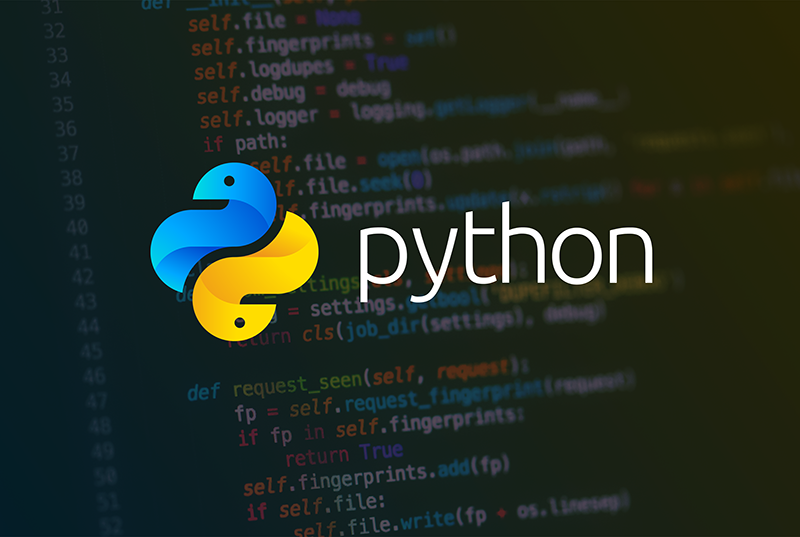



Perfil do Adimplente e do Inadimplente



Cartão de crédito, crediário, cheque especial, empréstimos consignados e tantas outras modalidades de crédito são ferramentas de consumo poderosas. Quando bem utilizadas, potencializam a capacidade de compra e aumentam as chances de realizar sonhos de médio e longo prazo.

Porém, quando são utilizadas indiscriminadamente e de forma imediatista, podem trazer sérias consequências para a saúde financeira e para a vida do consumidor.

Pensando nisso, procuraramos mapear o perfil e a vida financeira
dos consumidores adimplentes e inadimplentes, entendendo as visões e diferenças de comportamento frente às compras/conquistas e o endividamento, a saber: que fatores podem ser relacionados à decisão de não cumprir os compromissos financeiros assumidos? Será que o grau de escolaridade e a capacidade (ou falta) de planejamento financeiro têm relação direta com as contas
em atraso e a restrição ao crédito? O que leva as pessoas a deixarem de pagar suas contas, mesmo quando poderiam fazê-lo? De que forma atitudes como “pensar mais no futuro”, pesquisar preços e parcelar compras relacionam-se com a adimplência ou a inadimplência?

Vamos estabelecer um perfil de adimplência e inadimplência a partir dos dados de crédito presentes no link:

https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv

Os dados estão em formato CSV e contém informações sobre clientes de uma instituição financeira. Nossas análises estarão dedicadas a explicar o comportamento da variável default, coluna 2 da base de dados. Quando um cliente recebeu default = 0, ele é adimplente. Quando um cliente recebeu default = 1, ele é inadimplente.

# 2.   Importação de módulos

In [1]:
# Importação de pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style("whitegrid")

# 3.   Leitura dos dados

In [2]:
# Vamos chamar nosso conjunto de dados pela variável bd(base de dados).
url = "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv"

bd = pd.read_csv(url, na_values='na')

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
bd.head(n=6)

# 4. Exploração de dados


## 4.1. Estrutura

Vamos utilizar a função shape da biblioteca pandas para dimensionar nosso conjunto de dados em termos da quantidade de linhas e colunas.

In [ ]:
bd.shape

Agora sabemos que temos no arquivo csv 10127 linhas e 16 colunas. A primeira linha, contém o cabeçalho das colunas.

Podemos contar quantos clientes são adimplentes, ou seja, default = 0.

In [ ]:
bd[bd['default'] == 0].shape

De modo análogo, contamos a quantidade de clientes inadimplentes, fazendo:

In [ ]:
bd[bd['default'] == 1].shape

Podemos atribuir à variáveis, a quantidade total de clientes, e os seguimentos de adimplentes e inadimplentes, de modo a obter valores proporcionais.

In [ ]:
qtd_total, _ = bd.shape
qtd_adimplentes, _ = bd[bd['default'] == 0].shape
qtd_inadimplentes, _ = bd[bd['default'] == 1].shape

In [ ]:
print(f"A proporção de clientes ADIMPLENTES é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporção de clientes INADIMPLENTES é de {round(100 * qtd_inadimplentes/ qtd_total, 2)}%")

Vamos analisar o Schema de nossos dados.

## 4.2. Schema

In [ ]:
bd.dtypes

Avaliando os tipos de dados das 16 colunas, verificamos que as colunas limite_credito e valor_transacoes_12m, contém valores do tipo string. O tipo adequado seria float.

Vamos fazer um breve resumo das variáveis atributos e numéricas. Começando pelas atributo.

In [ ]:
bd.select_dtypes('object').describe().transpose()

E agora as variáveis numéricas:

In [ ]:
bd.drop('id',   axis=1).select_dtypes('number').describe().transpose()

Vamos verificar se nosso banco de dados contém valores em branco.

In [ ]:
bd.isna().any()

Há dados faltando nas colunas escolaridade, estado_civil e salario_anual. Vamos fazer um resumo estatístico para analisar o impacto da falta de dados e decidirmos se podemos prosseguir nossas análises.  

## 4.3. Dados faltantes

In [ ]:
def stats_dados_faltantes(bd: pd.DataFrame) ->  None:

  stats_dados_faltantes=  []
  for col in bd.columns:
    if bd[col].isna().any():
      qtd,_ = bd[bd[col].isna()].shape
      total,_ = bd.shape
      dict_dados_faltantes= {col: {'quantidade': qtd, "porcentagem": round(100 *  qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

Com a função stats_dados_faltantes, podemos analisar o impacto da falte de dados observada.

In [ ]:
stats_dados_faltantes(bd=bd)

Na coluna escolaridade, 15% dos dados estão faltando. Enquanto que na coluna estado_civil, os dados faltantes representam mais de 7% e o salario_atual repsonde por 11% da falta de dados. Vamos verificar se as proporções são mantidas quando analisamos os dados dos clientes adimplentes e inadimplentes.

In [ ]:
stats_dados_faltantes(bd=bd[bd['default']==0])

In [ ]:
stats_dados_faltantes(bd=bd[bd['default']==1])

# 5. Transformação e limpeza de dados


## 5.1. Correção de schema

In [ ]:
fn =  lambda  valor: float(valor.replace(".", "").replace(",", "."))

In [ ]:
bd['valor_transacoes_12m'] =  bd['valor_transacoes_12m'].apply(fn)
bd['limite_credito'] =  bd['limite_credito'].apply(fn)

In [ ]:
bd.dtypes

## 5.2. Exclusão de dados faltantes

In [ ]:
bd.dropna(inplace=True)

In [ ]:
bd.shape

In [ ]:
bd[bd['default'] == 0].shape

In [ ]:
bd[bd['default'] == 1].shape

In [ ]:
qtd_total_novo, _ = bd.shape
qtd_adimplentes_novo, _ = bd[bd['default'] == 0].shape
qtd_inadimplentes_novo, _ = bd[bd['default'] == 1].shape

In [ ]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes/ qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")

print("")

print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

Após exclusão dos registros incompletos, restaram 7081 linhas com dados completamente preenchidos. Proporcionalmente o default manteve-se muito perto dos percentuais antes da exclusão.

#6.   Visões Gráficas

## 6.1. Variáveis Categóricas

In [ ]:
bd_adimplentes = bd[bd['default']==0]
bd_inadimplentes = bd[bd['default']==1]

In [ ]:
bd.select_dtypes('object').head(n=5)



*   Escolaridade

In [ ]:
# Definindo a coluna de interesse
coluna = 'escolaridade'

# Definir uma paleta de cores
paleta_cores = sns.color_palette("hsv", len(bd[coluna].unique()))

titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

max_y = 0

for eixo, (dataframe, titulo) in enumerate(zip([bd, bd_adimplentes, bd_inadimplentes], titulos)):
    # Calcular frequências
    bd_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
    bd_to_plot[coluna] = bd_to_plot.index
    bd_to_plot.reset_index(drop=True, inplace=True)  # Redefinir o índice para evitar ambiguidade

    # Verificar o conteúdo do DataFrame
    #print(f"DataFrame para {titulo}:\n", bd_to_plot.head())

    # Ordenar os valores
    bd_to_plot.sort_values(by=[coluna], inplace=True)

    # Plotar os dados
    f = sns.barplot(x=bd_to_plot[coluna], y=bd_to_plot['frequencia_absoluta'], ax=eixos[eixo], palette=paleta_cores)
    f.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticks(range(len(bd_to_plot[coluna])))
    f.set_xticklabels(labels=bd_to_plot[coluna], rotation=90)

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

# Ajustar layout
figura.show()



*   Salário Anual


In [ ]:
# Definindo a coluna de interesse
coluna = 'salario_anual'

# Definir uma paleta de cores
paleta_cores = sns.color_palette("hsv", len(bd[coluna].unique()))

titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

max_y = 0

for eixo, (dataframe, titulo) in enumerate(zip([bd, bd_adimplentes, bd_inadimplentes], titulos)):
    # Calcular frequências
    bd_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
    bd_to_plot[coluna] = bd_to_plot.index
    bd_to_plot.reset_index(drop=True, inplace=True)  # Redefinir o índice para evitar ambiguidade

    # Verificar o conteúdo do DataFrame
    #print(f"DataFrame para {titulo}:\n", bd_to_plot.head())

    # Ordenar os valores
    bd_to_plot.sort_values(by=[coluna], inplace=True)

    # Plotar os dados
    f = sns.barplot(x=bd_to_plot[coluna], y=bd_to_plot['frequencia_absoluta'], ax=eixos[eixo], palette=paleta_cores)
    f.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticks(range(len(bd_to_plot[coluna])))
    f.set_xticklabels(labels=bd_to_plot[coluna], rotation=90)

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

# Ajustar layout
#plt.tight_layout()
#plt.show()
figura.show()

In [ ]:
# Definindo a coluna de interesse
coluna = 'estado_civil'

# Definir uma paleta de cores
paleta_cores = sns.color_palette("hsv", len(bd[coluna].unique()))

titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

max_y = 0

for eixo, (dataframe, titulo) in enumerate(zip([bd, bd_adimplentes, bd_inadimplentes], titulos)):
    # Calcular frequências
    bd_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
    bd_to_plot[coluna] = bd_to_plot.index
    bd_to_plot.reset_index(drop=True, inplace=True)  # Redefinir o índice para evitar ambiguidade

    # Verificar o conteúdo do DataFrame
    #print(f"DataFrame para {titulo}:\n", bd_to_plot.head())

    # Ordenar os valores
    bd_to_plot.sort_values(by=[coluna], inplace=True)

    # Plotar os dados
    f = sns.barplot(x=bd_to_plot[coluna], y=bd_to_plot['frequencia_absoluta'], ax=eixos[eixo], palette=paleta_cores)
    f.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticks(range(len(bd_to_plot[coluna])))
    f.set_xticklabels(labels=bd_to_plot[coluna], rotation=90)

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

# Ajustar layout
#plt.tight_layout()
#plt.show()
figura.show()

In [ ]:
# Definindo a coluna de interesse
coluna = 'tipo_cartao'

# Definir uma paleta de cores
paleta_cores = sns.color_palette("hsv", len(bd[coluna].unique()))

titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

max_y = 0

for eixo, (dataframe, titulo) in enumerate(zip([bd, bd_adimplentes, bd_inadimplentes], titulos)):
    # Calcular frequências
    bd_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
    bd_to_plot[coluna] = bd_to_plot.index
    bd_to_plot.reset_index(drop=True, inplace=True)  # Redefinir o índice para evitar ambiguidade

    # Verificar o conteúdo do DataFrame
    #print(f"DataFrame para {titulo}:\n", bd_to_plot.head())

    # Ordenar os valores
    bd_to_plot.sort_values(by=[coluna], inplace=True)

    # Plotar os dados
    f = sns.barplot(x=bd_to_plot[coluna], y=bd_to_plot['frequencia_absoluta'], ax=eixos[eixo], palette=paleta_cores)
    f.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticks(range(len(bd_to_plot[coluna])))
    f.set_xticklabels(labels=bd_to_plot[coluna], rotation=90)

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

# Ajustar layout
#plt.tight_layout()
#plt.show()
figura.show()

## 6.2. Visualizações Numéricas



*   Quantidade de Transações nos Últimos 12 Meses



In [ ]:
# Definindo a coluna de interesse
coluna = 'qtd_transacoes_12m'

# Definir uma paleta de cores
paleta_cores = sns.color_palette("hsv", len(bd[coluna].unique()))

titulos = ['Qtde. de Transações no Último Ano', 'Qtde. de Transações no Último Ano de Adimplentes', 'Qtde. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

max_y = 0

for dataframe, eixo, titulo in zip([bd, bd_adimplentes, bd_inadimplentes], eixos, titulos):

    # Plotar os dados
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixo)
    f.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

figura.show()



*   Valor das Transações nos Últimos 12 Meses

In [ ]:
# Definindo a coluna de interesse
coluna = 'valor_transacoes_12m'

# Definir uma paleta de cores
paleta_cores = sns.color_palette("hsv", len(bd[coluna].unique()))

titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

max_y = 0

for dataframe, eixo, titulo in zip([bd, bd_adimplentes, bd_inadimplentes], eixos, titulos):

    # Plotar os dados
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixo)
    f.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

figura.show()



*   Valor de Transações nos Últimos 12 Meses X Quantidade de Transações nos Últimos 12 Meses.

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=bd, hue='default')

# Ajustar o título e os rótulos dos eixos
f.fig.suptitle('Relação entre Valor e Quantidade de Transações no Último Ano')
f.set_axis_labels('Valor das Transações no último Ano', 'Quantidade das Transações do Último Ano')

# Ajustar a posição do título para evitar sobreposição
plt.subplots_adjust(top=0.9)

# Mostrar o gráfico
plt.show()


# 7. Modelo de Predição Baseado em Machine Learning

In [ ]:
# Pré-processamento dos Dados
bd = bd.dropna()  # Remover linhas com valores faltantes
bd = pd.get_dummies(bd, drop_first=True)  # Codificar variáveis categóricas

# Definir variáveis alvo e preditoras
X = bd[['valor_transacoes_12m', 'qtd_transacoes_12m', 'dependentes','qtd_produtos']]
y = bd['default']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Fazer previsões
y_pred = classifier.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Avaliar um novo cliente
novo_cliente = [[828343084, 48, 'M', 4, 'mestrado', 'casado', '$20K - $40K', 'gold', 13, 2, 1, 2, 8000, 1000, 37]]

# Supondo que 'novo_cliente' seja um DataFrame com os dados do cliente
novo_cliente_encoded = pd.get_dummies(pd.DataFrame(novo_cliente))

# Garanta que todas as colunas do treinamento estejam no novo cliente
novo_cliente_encoded = novo_cliente_encoded.reindex(columns=X.columns, fill_value=0)

# Normalizar os dados
novo_cliente_scaled = scaler.transform(novo_cliente_encoded)  # Uso o mesmo scaler do código original

# Fazer a previsão usando o modelo treinado
predicted_class = classifier.predict(novo_cliente_scaled)

In [ ]:
# Exibir a previsão
if predicted_class[0] == 1:
    print("Cliente é potencialmente Adimplente")
else:
    print("Cliente é potencialmente Inadimplente")

# 8. Storytelling

Cartão de crédito, crediário, cheque especial, empréstimos consignados e tantas outras modalidades de crédito são ferramentas de consumo poderosas. Quando bem utilizadas, potencializam a capacidade de compra e aumentam as chances de realizar sonhos de médio e longo prazo.

Porém, quando são utilizadas indiscriminadamente e de forma imediatista, podem trazer sérias consequências para a saúde financeira e para a vida do consumidor.

Pensando nisso, procuraramos mapear o perfil e a vida financeira dos consumidores adimplentes e inadimplentes, entendendo as visões e diferenças de comportamento frente às compras/conquistas e o endividamento, a saber: que fatores podem ser relacionados à decisão de não cumprir os compromissos financeiros assumidos?

Vamos explorar a escolaridade dos clientes de uma instituição financeira, divididos em três grupos: total, adimplentes e inadimplentes.

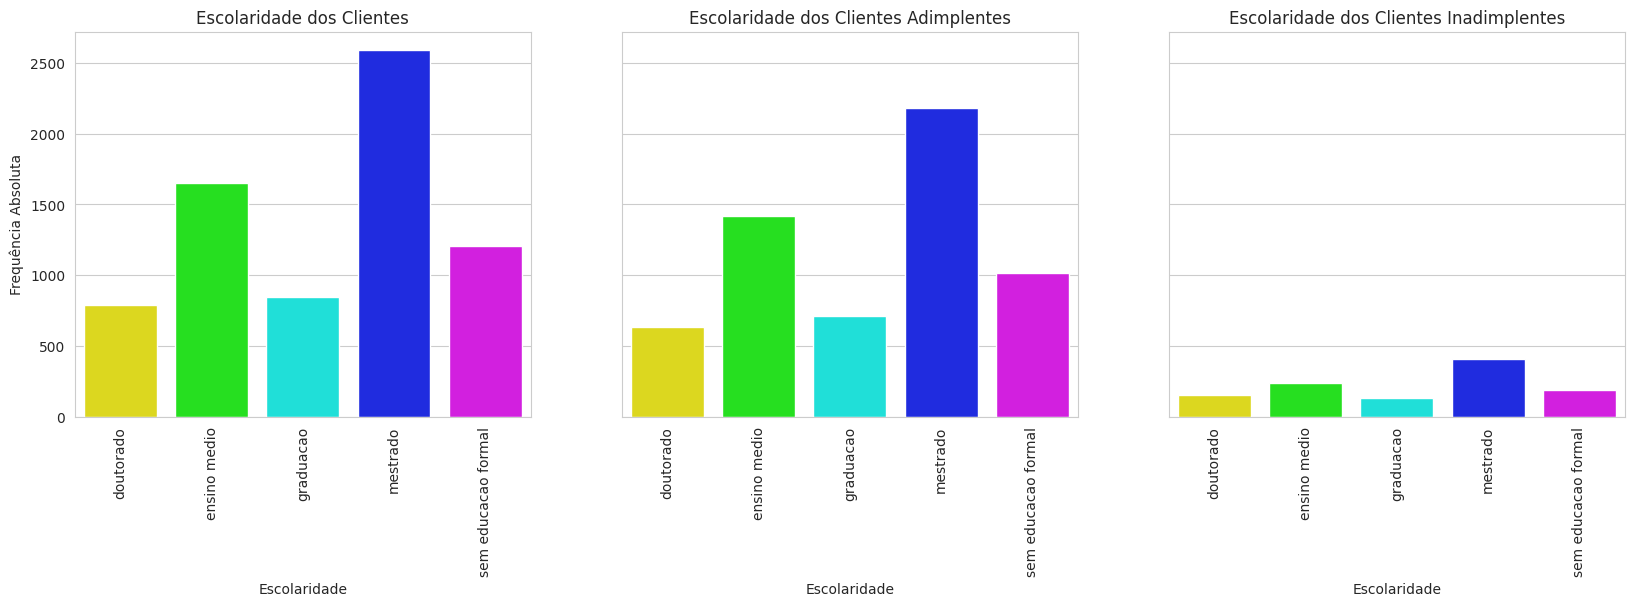

Como vemos no primeiro gráfico a maioria dos clientes da instituição financeira possui nível mestrado de escolaridade. Observando os clientes adimplentes, notamos uma predominância similar.A mesma condição pode ser verificada, também, quanto aos clientes Inadimplentes. Nota-se ainda que, aproximadamente, 84% dos clientes são ADIMPLENTES, enquanto 16% são inadimplentes.

Esses dados sugerem que a escolaridade pode ter uma correlação com a adimplência.
Essas informações podem ser valiosas para criar estratégias mais eficazes de gestão de crédito.

Analisando-se a classificação, segundo o salário anual, nota-se que a maioria dos clientes possui renda anual menor que 40 mil reais. Condição verificada para os clientes adimplentes e também para os clientes inadimplentes. Onde cerca de 500 clientes encontram-se inadimplentes.

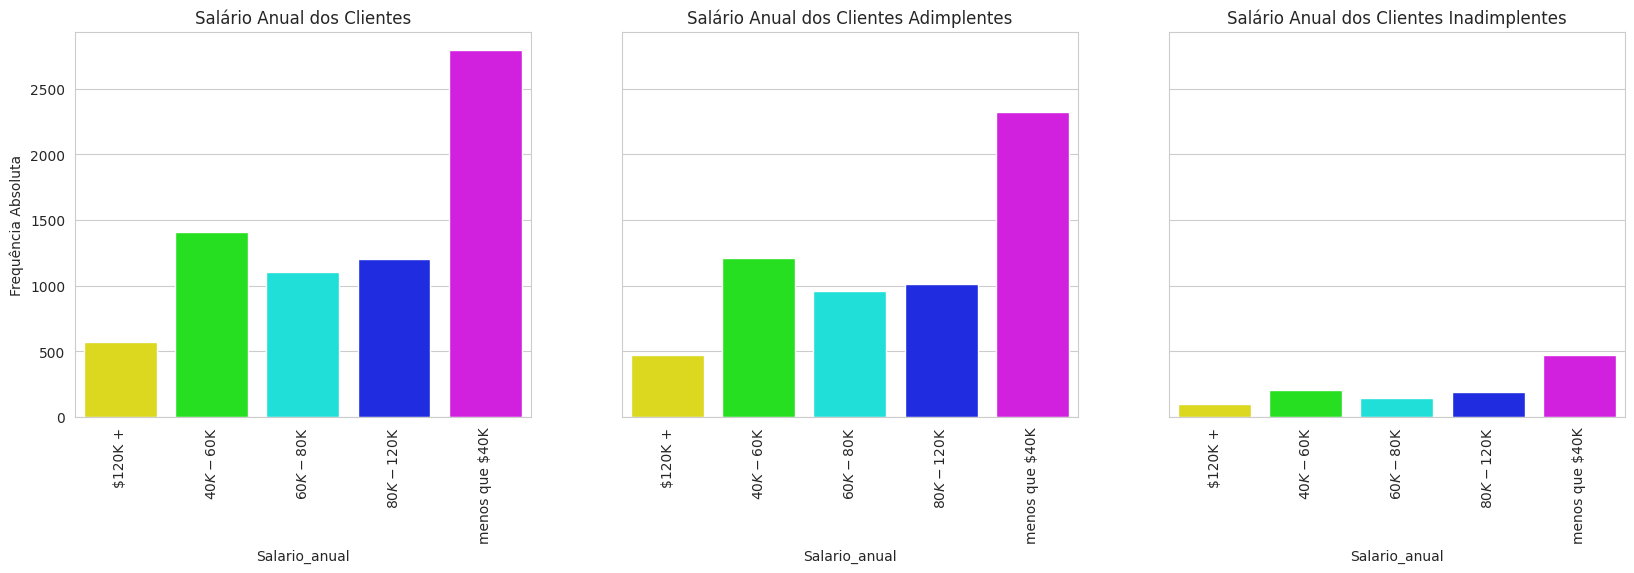

Nota-se, no gráfico abaixo, que os divorciados são menos inadimplentes que solteiros e casados, que são proporcionalmente iguais. Pensão alimentícia(?).

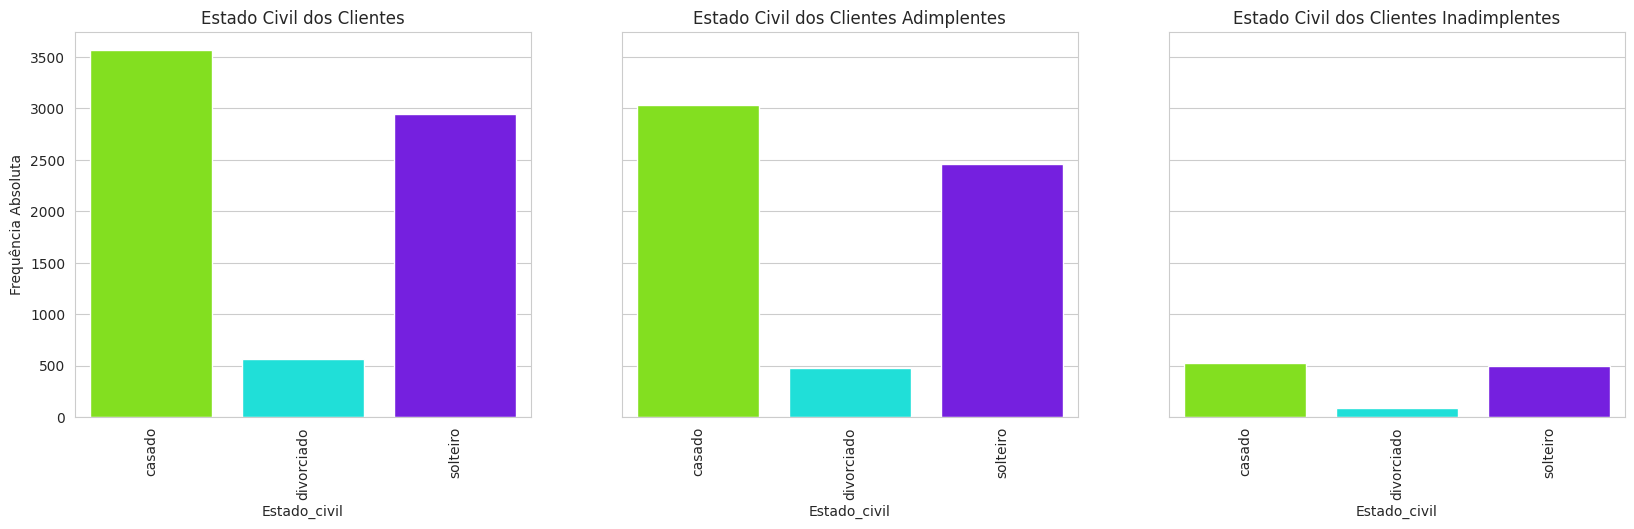

Analisando-se os dados segundo o tipo de cartão de crédito, nota-se que clientes com cartão azul, tem predominância de inadimplência.

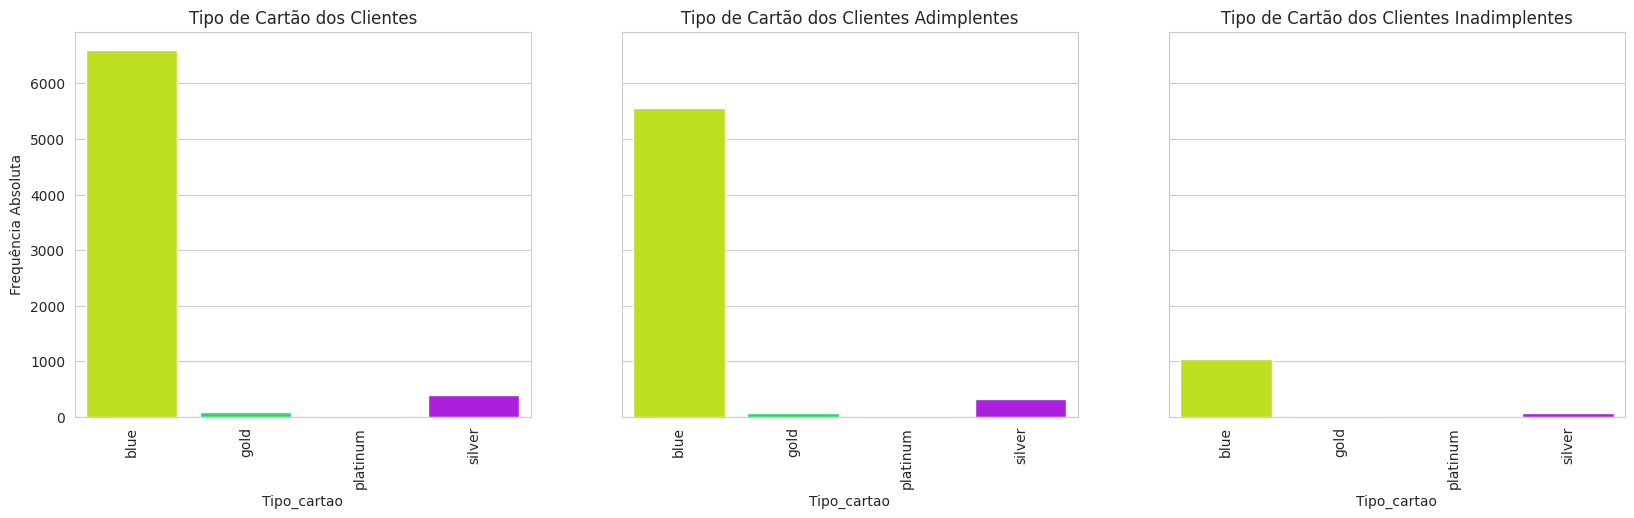

Segundo o volume de transações no período de um ano, percebe-se que clientes inadimplentes, fazem em média 40 transações ao ano. Enquanto que os clientes adimplentes, transacionam em média o dobro desse valor, 80 transações ao ano.

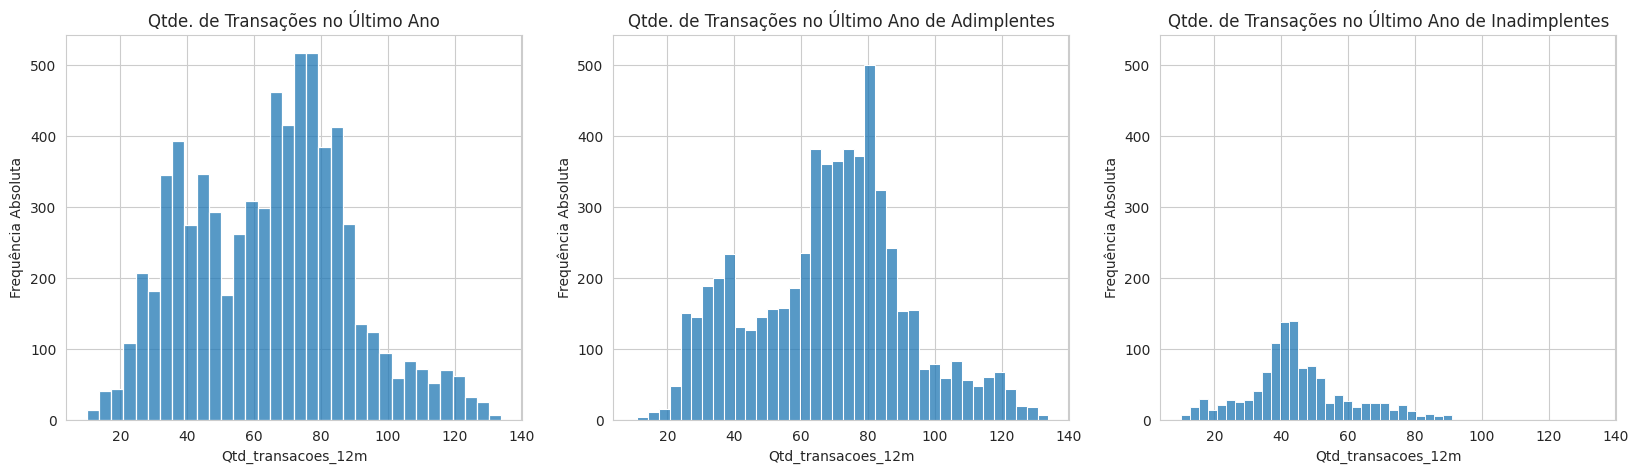

Classificando-se os dados com base no volume financeiro envolvido em um ano de transações, clientes inadimplentes tendem a movimetar, em média dois mil e quinhentos reais. Enquanto que os clientes adimplentes movimentam em média cinco mil reais,

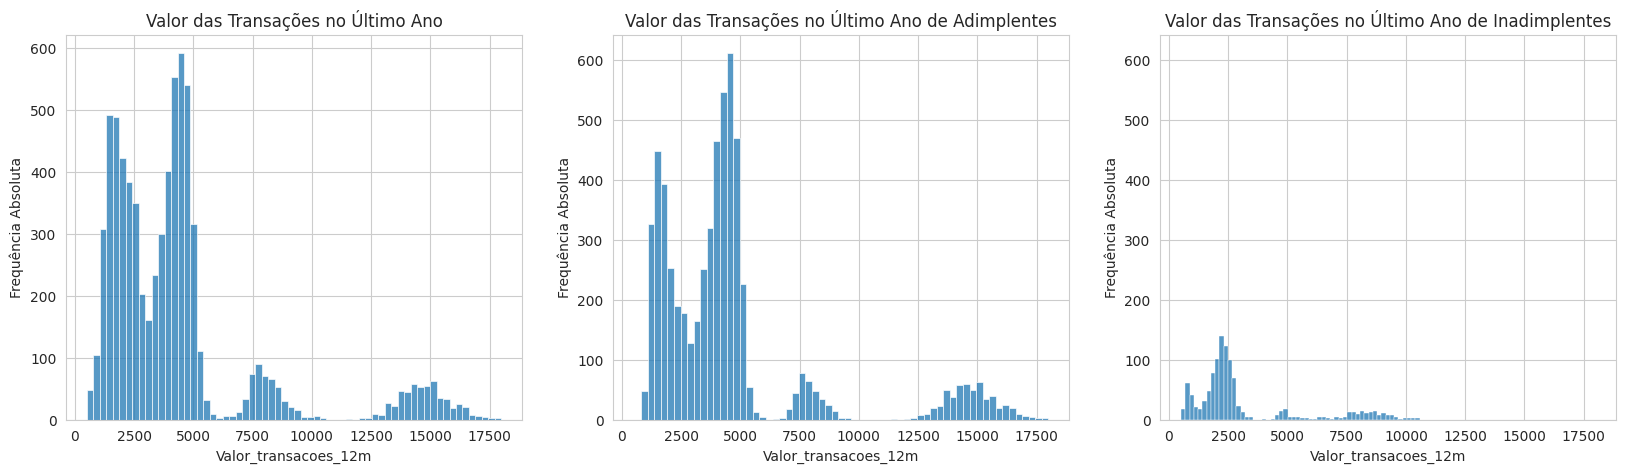

Avalinado-se a correlação entre o número de transações e o volume de dinheiro movimentado, nota-se um grupo que faz muitas transações com quantias elevadas.

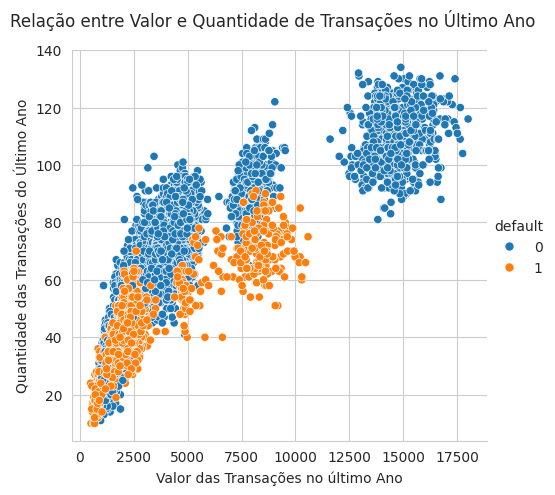

Das análises feitas, podemos concluir que um cliente com cartão gold ou platinum, que movimenta bastante transações e com valores elevados e possua nível de escolaridade de graduação ou doutorado, é potencialmente adimplente e pode ter seu pedido de crédito financeiro concedido.